In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import random
from math import pi

In [0]:
teamStats = pd.read_csv("agg_team_stats.csv")

March Madness winners from 2013 to 2017
Lousiville, Connecticut, Duke, Villanova, UNC

In [0]:
#Get March Madness winners
Louisville = teamStats[teamStats.market == "Louisville"]
Uconn = teamStats[teamStats.market == "Connecticut"]
Duke = teamStats[teamStats.market == "Duke"]
Nova = teamStats[teamStats.market == "Villanova"]
UNC = teamStats[teamStats.market == "North Carolina"]

In [0]:
#Get stats for year they won title
Louisville = Louisville[Louisville.season == 2013]
Uconn = Uconn[Uconn.season == 2014]
Duke = Duke[Duke.season == 2015]
Nova = Nova[Nova.season == 2016]
UNC = UNC[UNC.season == 2017]

In [0]:
#Delete extra columns function
def deleteCol(x):
  x = x.drop(columns = ['team_id', 'alias', 'conf_id',
        'division_alias', 'conf_name', 'conf_alias','field_goals_made', 'field_goals_att',
        'three_points_made', 'three_points_att','two_points_made', 'two_points_att',
        'blocked_att','free_throws_made', 'free_throws_att','offensive_rebounds', 'defensive_rebounds',
        'assists_turnover_ratio','personal_fouls', 'ejections', 'foulouts','fast_break_pts',
        'second_chance_pts', 'team_turnovers', 'points_off_turnovers',
        'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
        'team_tech_fouls', 'coach_tech_fouls', 'opp_points_game',
        'opp_field_goals_pct', 'opp_rebounds', 'opp_turnovers', 'NCAA',
        'Conference','Conf_Win', 'Conf_Loss', 'Win_Perc',
        'Conf_Win_Perc', 'Conference_Champ','three_points_pct','two_points_pct', 'free_throws_pct','points'])
  return x


In [0]:

Louisville = deleteCol(Louisville)
Uconn = deleteCol(Uconn)
Duke = deleteCol(Duke)
Nova = deleteCol(Nova)
UNC = deleteCol(UNC)

In [0]:
print(Louisville)
print(Uconn)
print(Duke)
print(Nova)
print(UNC)

    season       name      market  points_game  ...     steals    blocks   Win  Loss
80    2013  Cardinals  Louisville    82.117647  ...  10.117647  4.617647  29.0   5.0

[1 rows x 12 columns]
     season     name       market  points_game  ...    steals    blocks   Win  Loss
529    2014  Huskies  Connecticut    64.176471  ...  4.647059  5.235294  20.0  14.0

[1 rows x 12 columns]
     season         name market  points_game  ...    steals    blocks   Win  Loss
739    2015  Blue Devils   Duke    81.454545  ...  6.393939  4.181818  23.0  10.0

[1 rows x 12 columns]
      season      name     market  points_game  ...    steals    blocks   Win  Loss
1396    2016  Wildcats  Villanova    77.676471  ...  7.235294  3.088235  31.0   3.0

[1 rows x 12 columns]
      season       name          market  ...    blocks   Win  Loss
1703    2017  Tar Heels  North Carolina  ...  4.228571  25.0  10.0

[1 rows x 12 columns]


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:2227: UserWarning: Trying to create polar plot on an axis that does not have a polar projection.
  warnings.warn('Trying to create polar plot on an axis that does '
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:935: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.05, '2017 UNC')

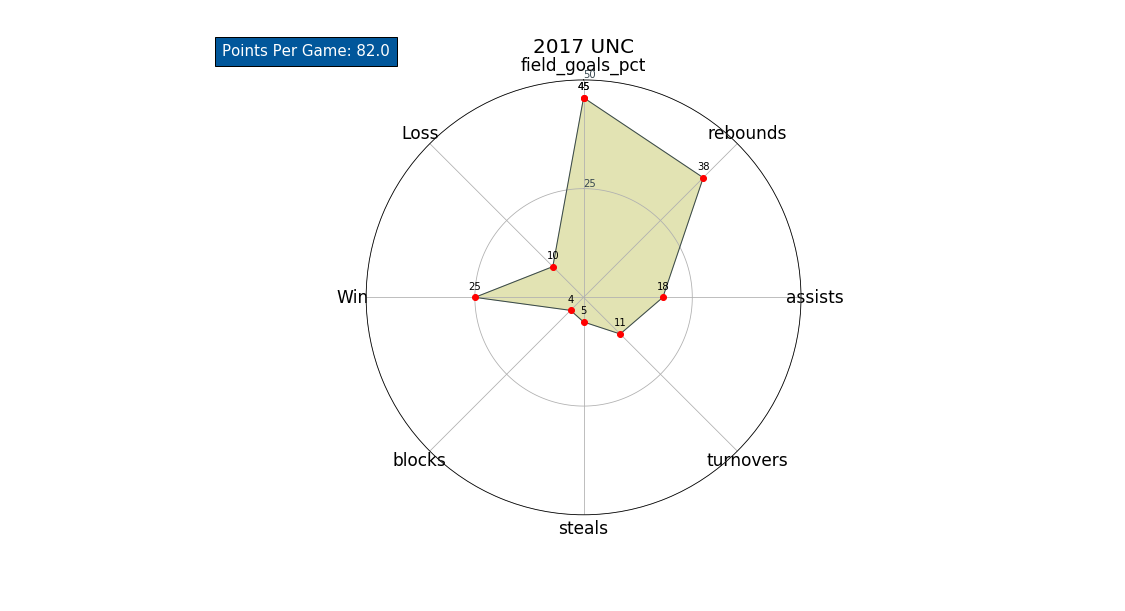

In [0]:
#Plot 2017 UNC
plt.figure(figsize=(15,8))
categories=list(UNC)

columnDontUseGraph = ['season','name','market','points_game']
N = len(categories) - len(columnDontUseGraph)

categories.remove('season')
categories.remove('name')
categories.remove('market')
categories.remove('points_game')

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

r = lambda: random.randint(0,255)
colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
basic_color = '#37474f'

ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, color= 'black', size=17)
ax.set_rlabel_position(0)
plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
plt.ylim(0,50)

values = UNC.drop(['season','name','market','points_game'],axis=1).values.flatten().tolist() 
valuesDontUseGraph = ["season","name","market","points_game"]
values = [e for e in values if e not in (valuesDontUseGraph)]
values += values[:1]
    
ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
ax.fill(angles, values, color= colorRandom, alpha=0.5)
axes_coords = [0, 0, 1, 1]
ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
ax_image.axis('off')

ax.annotate('Points Per Game: ' + str(round(UNC.points_game.iloc[0],1)), xy=(10,10), xytext=(43, 100),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       y=6, units='dots')

for x, y in zip(angles, values):
    plt.polar(x, y, 'ro')
    plt.text(x, y, '%d' % (int(y)),
             transform=trans_offset,
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title("2017 UNC",fontsize=20)

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:2227: UserWarning: Trying to create polar plot on an axis that does not have a polar projection.
  warnings.warn('Trying to create polar plot on an axis that does '
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:935: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.05, '2016 Villanova')

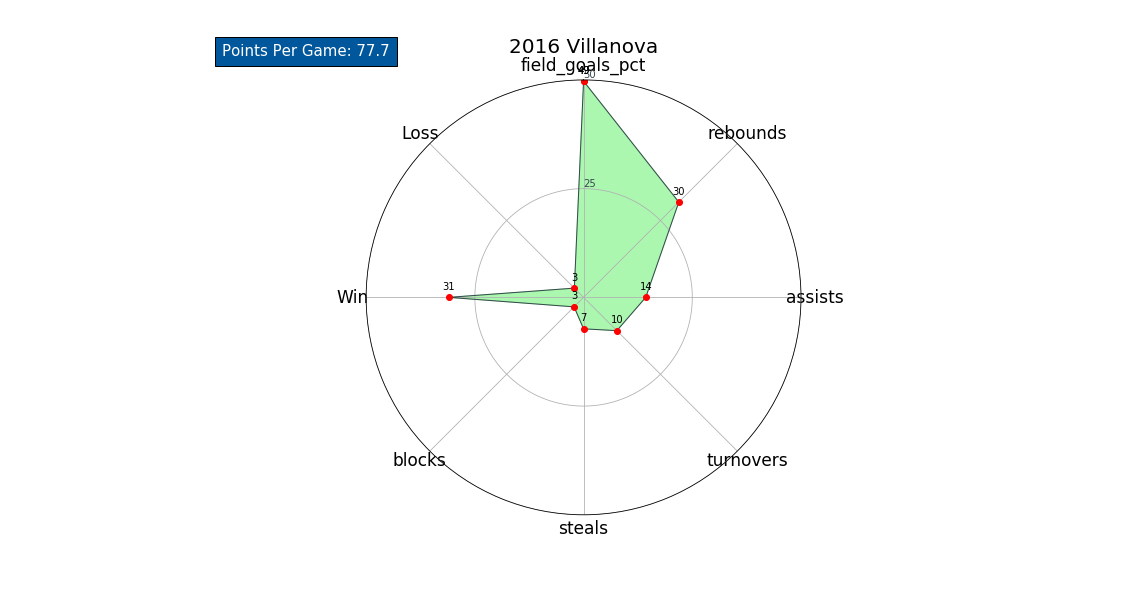

In [0]:
#Plot 2016 Villanova
plt.figure(figsize=(15,8))
categories=list(Nova)

columnDontUseGraph = ['season','name','market','points_game']
N = len(categories) - len(columnDontUseGraph)

categories.remove('season')
categories.remove('name')
categories.remove('market')
categories.remove('points_game')

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

r = lambda: random.randint(0,255)
colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
basic_color = '#37474f'

ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, color= 'black', size=17)
ax.set_rlabel_position(0)
plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
plt.ylim(0,50)

values = Nova.drop(['season','name','market','points_game'],axis=1).values.flatten().tolist() 
valuesDontUseGraph = ["season","name","market","points_game"]
values = [e for e in values if e not in (valuesDontUseGraph)]
values += values[:1]
    
ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
ax.fill(angles, values, color= colorRandom, alpha=0.5)
axes_coords = [0, 0, 1, 1]
ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
ax_image.axis('off')

ax.annotate('Points Per Game: ' + str(round(Nova.points_game.iloc[0],1)), xy=(10,10), xytext=(43, 100),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       y=6, units='dots')

for x, y in zip(angles, values):
    plt.polar(x, y, 'ro')
    plt.text(x, y, '%d' % (int(y)),
             transform=trans_offset,
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title("2016 Villanova",fontsize=20)

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:2227: UserWarning: Trying to create polar plot on an axis that does not have a polar projection.
  warnings.warn('Trying to create polar plot on an axis that does '
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:935: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.05, '2015 Duke')

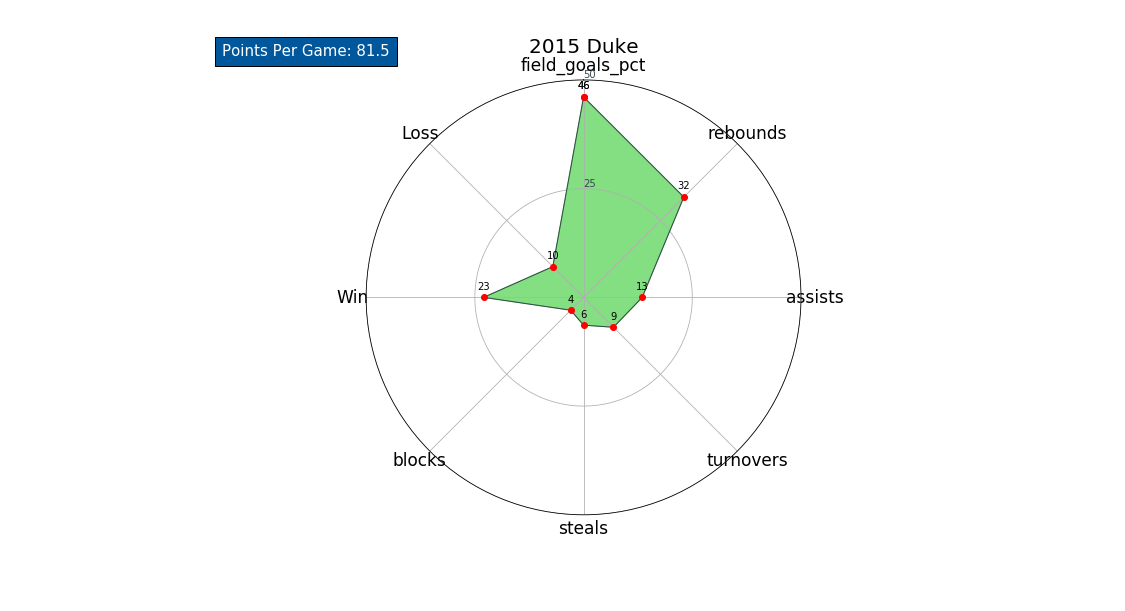

In [0]:
#Plot 2015 Duke
plt.figure(figsize=(15,8))
categories=list(Duke)

columnDontUseGraph = ['season','name','market','points_game']
N = len(categories) - len(columnDontUseGraph)

categories.remove('season')
categories.remove('name')
categories.remove('market')
categories.remove('points_game')

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

r = lambda: random.randint(0,255)
colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
basic_color = '#37474f'

ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, color= 'black', size=17)
ax.set_rlabel_position(0)
plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
plt.ylim(0,50)

values = Duke.drop(['season','name','market','points_game'],axis=1).values.flatten().tolist() 
valuesDontUseGraph = ["season","name","market","points_game"]
values = [e for e in values if e not in (valuesDontUseGraph)]
values += values[:1]
    
ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
ax.fill(angles, values, color= colorRandom, alpha=0.5)
axes_coords = [0, 0, 1, 1]
ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
ax_image.axis('off')

ax.annotate('Points Per Game: ' + str(round(Duke.points_game.iloc[0],1)), xy=(10,10), xytext=(43, 100),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       y=6, units='dots')

for x, y in zip(angles, values):
    plt.polar(x, y, 'ro')
    plt.text(x, y, '%d' % (int(y)),
             transform=trans_offset,
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title("2015 Duke",fontsize=20)

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:2227: UserWarning: Trying to create polar plot on an axis that does not have a polar projection.
  warnings.warn('Trying to create polar plot on an axis that does '
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:935: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.05, '2014 UConn')

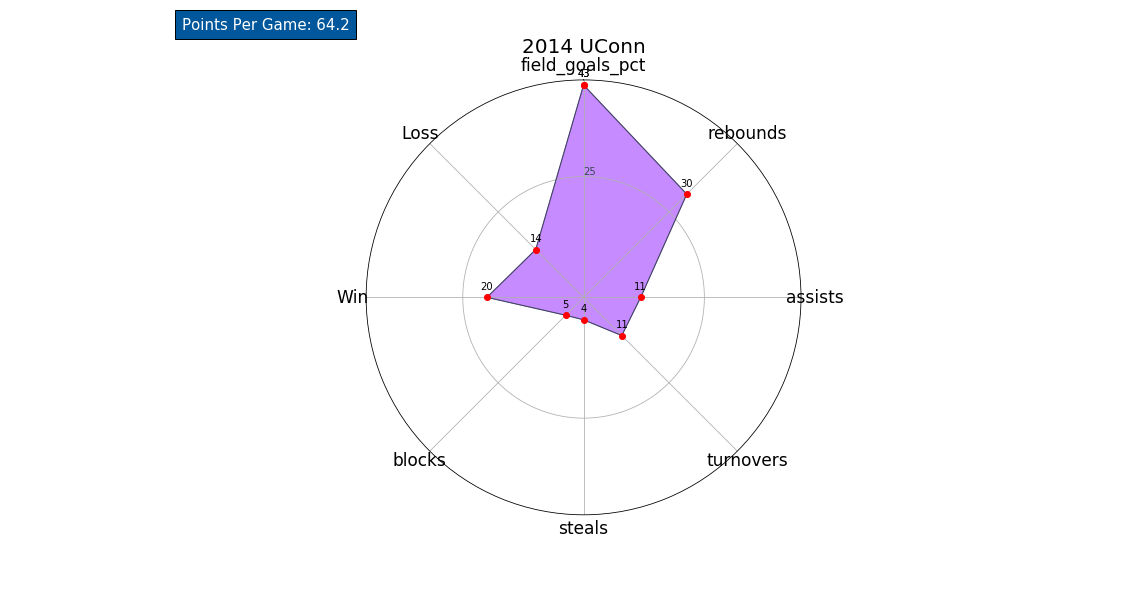

In [0]:
#Plot 2014 UConn
plt.figure(figsize=(15,8))
categories=list(Uconn)

columnDontUseGraph = ['season','name','market','points_game']
N = len(categories) - len(columnDontUseGraph)

categories.remove('season')
categories.remove('name')
categories.remove('market')
categories.remove('points_game')

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

r = lambda: random.randint(0,255)
colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
basic_color = '#37474f'

ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, color= 'black', size=17)
ax.set_rlabel_position(0)
plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
plt.ylim(0,45)

values = Uconn.drop(['season','name','market','points_game'],axis=1).values.flatten().tolist() 
valuesDontUseGraph = ["season","name","market","points_game"]
values = [e for e in values if e not in (valuesDontUseGraph)]
values += values[:1]
    
ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
ax.fill(angles, values, color= colorRandom, alpha=0.5)
axes_coords = [0, 0, 1, 1]
ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
ax_image.axis('off')

ax.annotate('Points Per Game: ' + str(round(Uconn.points_game.iloc[0],1)), xy=(10,10), xytext=(43, 100),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       y=6, units='dots')

for x, y in zip(angles, values):
    plt.polar(x, y, 'ro')
    plt.text(x, y, '%d' % (int(y)),
             transform=trans_offset,
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title("2014 UConn",fontsize=20)

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:2227: UserWarning: Trying to create polar plot on an axis that does not have a polar projection.
  warnings.warn('Trying to create polar plot on an axis that does '
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:935: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.05, '2013 Louisville')

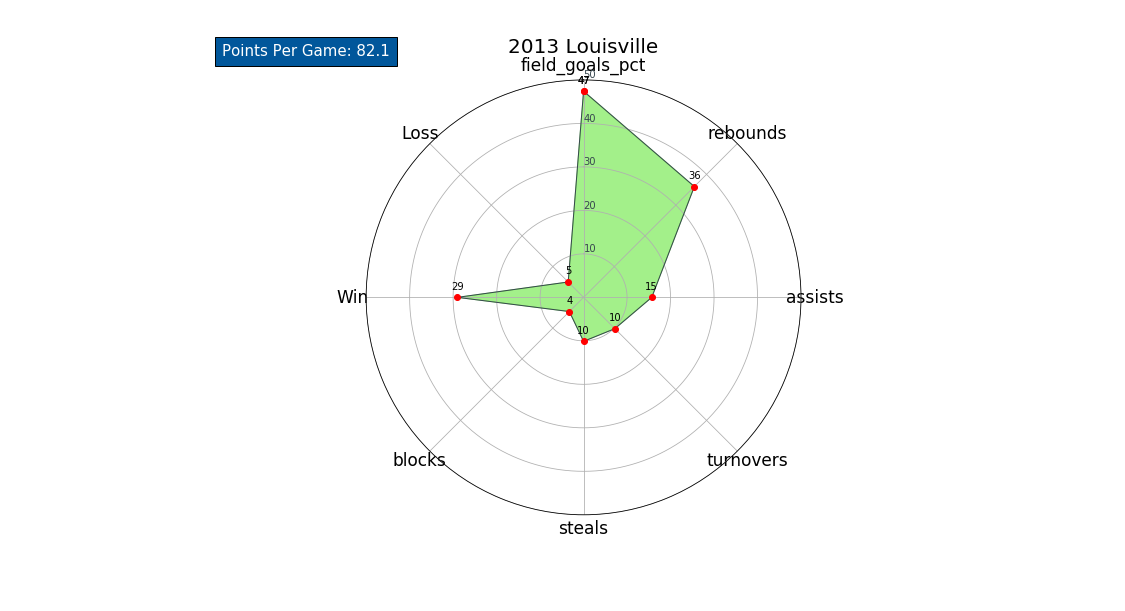

In [0]:
#Plot 2013 Louisville
plt.figure(figsize=(15,8))
categories=list(Louisville)

columnDontUseGraph = ['season','name','market','points_game']
N = len(categories) - len(columnDontUseGraph)

categories.remove('season')
categories.remove('name')
categories.remove('market')
categories.remove('points_game')

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

r = lambda: random.randint(0,255)
colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
basic_color = '#37474f'
color_annotate = '#01579b'

ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, color= 'black', size=17)
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50], ["10","20","30","40","50"], color= basic_color, size= 10)
plt.ylim(0,50)

values = Louisville.drop(['season','name','market','points_game'],axis=1).values.flatten().tolist() 
valuesDontUseGraph = ["season","name","market","points_game"]
values = [e for e in values if e not in (valuesDontUseGraph)]
values += values[:1]
    
ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
ax.fill(angles, values, color= colorRandom, alpha=0.5)
axes_coords = [0, 0, 1, 1]
ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
ax_image.axis('off')

ax.annotate('Points Per Game: ' + str(round(Louisville.points_game.iloc[0],1)), xy=(10,10), xytext=(43, 100),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       y=6, units='dots')

for x, y in zip(angles, values):
    plt.polar(x, y, 'ro')
    plt.text(x, y, '%d' % (int(y)),
             transform=trans_offset,
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title("2013 Louisville",fontsize=20)